### Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Line Graph

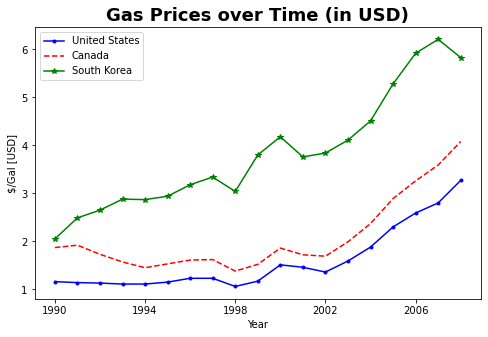

In [2]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

##the line shape 'b.-' must be before the label
plt.plot(gas.Year, gas.USA, 'b.-', label='United States')
plt.plot(gas.Year, gas.Canada,'r--', label='Canada')
##or use braket notation
plt.plot(gas['Year'], gas['South Korea'],'g*-', label='South Korea')

# ##plot all the countries
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country])

plt.legend()

##use lists to show every third year
##must be used AFTER plot
plt.xticks(gas.Year[::4])
#plt.xticks(gas.Year[::2].tolist()+[2011])

plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xlabel('Year')
plt.ylabel('$/Gal [USD]')

##higher dpi means higher resolution
plt.savefig('Gas_price_fig.png', dpi=300)

plt.show()

### FIFA Data

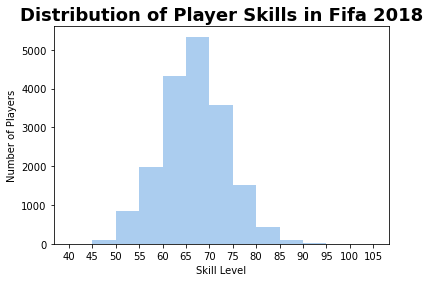

In [3]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(5)

## Show only the range from 40 to 100 skill
bins = np.arange(40,110,5).tolist()

plt.hist(fifa.Overall, bins=bins, color='#abcdef')
plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in Fifa 2018', fontdict={'fontweight':'bold', 'fontsize':18})

plt.show()

### Pie Charts

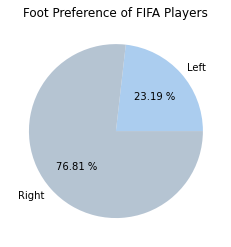

In [4]:
## Find and count all players by foot preference
## The [0] takes the first value from the count fn 
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbccdd']

# ## This does not work since it is not a series of numbers
# plt.pie(fifa['Preferred Foot'])

plt.pie([left, right], labels=labels, colors=colors, autopct= '%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

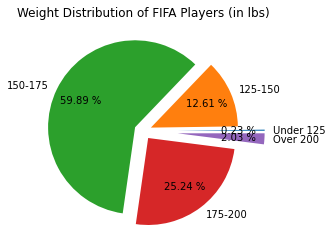

In [5]:
fifa = pd.read_csv('fifa_data.csv')

## Strip Weight column of 'lbs' and converted to float
fifa['Weight'] = fifa.Weight.str.strip('lbs')
fifa["Weight"] = pd.to_numeric(fifa["Weight"], downcast="float")

## Convert to Kg
# fifa['Weight'] = fifa['Weight'].apply(lambda x: x*0.4535)
fifa.Weight.head(5)

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[(fifa.Weight >= 200)].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200'] 
explode = (.4,.1,.1,.1,.4)

plt.title('Weight Distribution of FIFA Players (in lbs)')

## Using plt.show() cleans up the plot
plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=.7, explode=explode)
plt.show()

3008     73
4219     71
4957     70
5070     70
5201     70
5780     69
5823     69
6043     69
6797     68
6858     68
7006     68
7170     68
8365     67
8425     67
9360     66
9968     65
10236    65
12372    63
12752    63
13495    62
15436    59
15553    59
15634    59
15909    58
16050    58
17445    54
18170    48
Name: Overall, dtype: int64

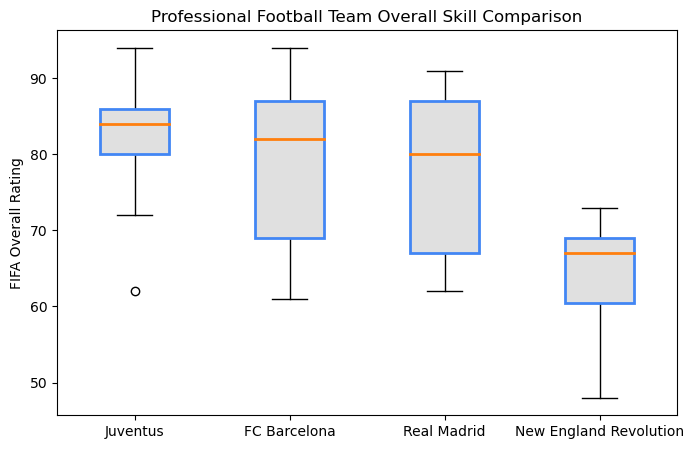

In [12]:
plt.style.use('default')

plt.figure(figsize=(8,5))

## Compare different teams by skills
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
r_madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
juv = fifa.loc[fifa.Club == 'Juventus']['Overall']

labels = ['Juventus', 'FC Barcelona', 'Real Madrid', 'New England Revolution']

boxes = plt.boxplot([juv,barcelona,r_madrid,revs], labels=labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    #Set edge color
    box.set(color='#4286f4', linewidth=2)
    #Change fill color
    box.set(facecolor='#e0e0e0')

plt.title('Professional Football Team Overall Skill Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()

In [8]:
club_rank = fifa.groupby(['Club']).mean().sort_values('Overall',ascending=False)
club_rank.Overall.head(10)

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
Name: Overall, dtype: float64